In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#import CSV Data Sukabumi
URL_dataskbm = 'https://drive.google.com/file/d/1pj69MnYIryd2PsKTo_meQXPN-tW5g9Yv/view?usp=share_link'
path_dataskbm = 'https://drive.google.com/uc?export=download&id='+URL_dataskbm.split('/')[-2]
df = pd.read_csv(path_dataskbm)

In [3]:
df.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 04:00:00.000,32.72,KOTA SUKABUMI,Cikujang,2,1040.0,121.0,19.150,13,33470770,2022-07-06,2.0,"MULTILINESTRING ((106.920499 -6.943148, 106.92..."
1,2022-07-06 06:00:00.000,32.72,KOTA SUKABUMI,N11 Lingkar Selatan Sukabumi,1,1736.0,72.5,26.915,8,33470771,2022-07-06,1.0,"MULTILINESTRING ((106.913803 -6.945039, 106.91..."
2,2022-07-06 07:00:00.000,32.72,KOTA SUKABUMI,RA Kosasih,2,1554.0,102.0,23.820,17,33470772,2022-07-06,2.0,"MULTILINESTRING ((106.950092 -6.920693, 106.94..."
3,2022-07-06 08:00:00.000,32.72,KOTA SUKABUMI,Jalan Selabintana,1,1661.0,92.0,24.280,1,33470773,2022-07-06,1.0,"LINESTRING (106.935435 -6.910731, 106.935807 -..."
4,2022-07-06 08:00:00.000,32.72,KOTA SUKABUMI,RA Kosasih,2,1554.0,89.0,24.250,5,33470774,2022-07-06,2.0,"MULTILINESTRING ((106.93553 -6.923046, 106.940..."


In [4]:
df.street.unique()

array(['Cikujang', 'N11 Lingkar Selatan Sukabumi', 'RA Kosasih',
       'Jalan Selabintana', 'RE Martadinata', 'Pelabuhan 2',
       'Jenderal Ahmad Yani', 'Jalan Bhayangkara', 'Jenderal Sudirman',
       'Pemuda', 'KH Ahmad Sanusi', 'Pasir Pogor', 'N11 Pembangunan',
       'Otto Iskandardinata', 'Jalan Raya Sukabumi', 'Surya Kencana', nan,
       'Siliwangi', 'Lamping', 'Ambubawa Sasana', 'Letda T Asmita',
       'Kapten Harun Kabir', 'Kapitan', 'Cicadas', 'Perintis Kemerdekaan',
       'Pajajaran', 'RH Didi Sukardi', 'Nyomplong', 'Widyakrama', 'Baros',
       'Limus Nunggal', 'Jalan Rumah Sakit', 'Wangun Reja', 'Gudang',
       'Bumi Purnawira Asri', 'Kibitay', 'Zaenal Zakse', 'Veteran 2',
       'Cibuntu', 'Arif Rahman Hakim', 'Sejahtera', 'Lettu Bakri',
       'Veteran', 'Kopeng', 'Stasiun Timur', 'Sarasa', 'Bantar Panjang',
       'Cipeulang Leutik', 'Pramuka 2', 'Tata Nugraha', 'Mayor Mahmud',
       'Baros Raya', 'Merbabu', 'KH Oim Abdurochim',
       'Sukabumi-Sukanegara', 'Kar

pengecekan data null. ditemukan terdapat beberapa data null pada kolom street.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10387 entries, 0 to 10386
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       10387 non-null  object 
 1   kemendagri_kabupaten_kode  10387 non-null  float64
 2   kemendagri_kabupaten_nama  10387 non-null  object 
 3   street                     10257 non-null  object 
 4   level                      10387 non-null  int64  
 5   median_length              10387 non-null  float64
 6   median_delay               10387 non-null  float64
 7   median_speed_kmh           10387 non-null  float64
 8   total_records              10387 non-null  int64  
 9   id                         10387 non-null  int64  
 10  date                       10387 non-null  object 
 11  median_level               10387 non-null  float64
 12  geometry                   10387 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usag

In [6]:
#cleaning data null
df_c = df.dropna(subset=['street'], inplace=True) 

In [7]:
df.isnull().sum()

time                         0
kemendagri_kabupaten_kode    0
kemendagri_kabupaten_nama    0
street                       0
level                        0
median_length                0
median_delay                 0
median_speed_kmh             0
total_records                0
id                           0
date                         0
median_level                 0
geometry                     0
dtype: int64

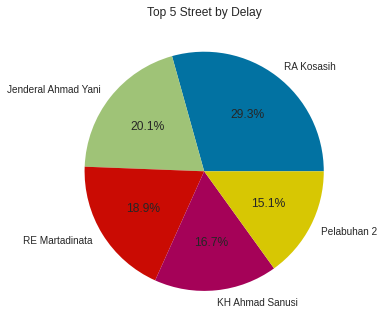

In [8]:
groupedbyname_df = df.groupby('street').sum()
sortedbydelay_df = groupedbyname_df.sort_values(by='median_delay', ascending=False)
top_5_delay = sortedbydelay_df.head(5)
plt.pie(top_5_delay['median_delay'], labels=top_5_delay.index, autopct='%1.1f%%')
plt.title('Top 5 Street by Delay')
plt.show()

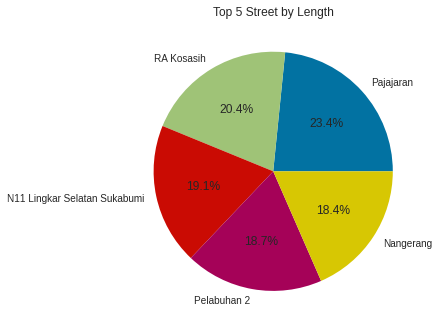

In [9]:
groupedbyname_df = df.groupby('street').mean()
sortedbylength_df = groupedbyname_df.sort_values(by='median_length', ascending=False)
top_5_length = sortedbylength_df.head(5)
plt.pie(top_5_length['median_length'], labels=top_5_length.index, autopct='%1.1f%%')
plt.title('Top 5 Street by Length')
plt.show()

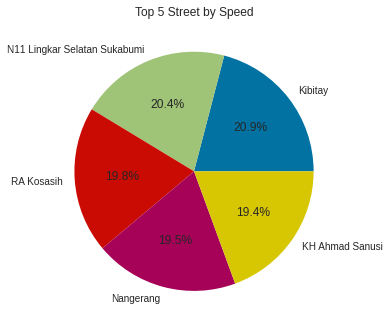

In [10]:
groupedbyname_df = df.groupby('street').mean()
sortedbyspeed_df = groupedbyname_df.sort_values(by='median_speed_kmh', ascending=False)
top_5_speed = sortedbyspeed_df.head(5)
plt.pie(top_5_speed['median_speed_kmh'], labels=top_5_speed.index, autopct='%1.1f%%')
plt.title('Top 5 Street by Speed')
plt.show()

# Melihat Korelasi antara variabel median

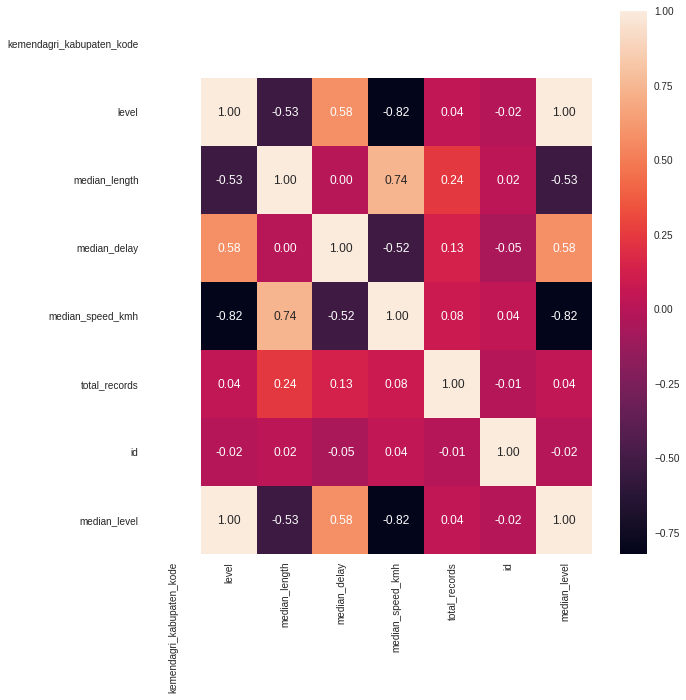

In [11]:
corrMatrix = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corrMatrix, annot=True, fmt='.2f')
plt.show()

In [12]:
df_copy = df.copy()

In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,0,0,15,1,748,123,2553,12,0,0,1,3384
1,1,0,0,56,0,1130,26,3832,7,1,0,0,2543
2,2,0,0,86,1,1058,85,3398,16,2,0,1,7708
3,3,0,0,29,0,1105,65,3476,0,3,0,0,827
4,3,0,0,86,1,1058,59,3471,4,4,0,1,6696


#Visualizing the ELBOW method to get the optimal value of K

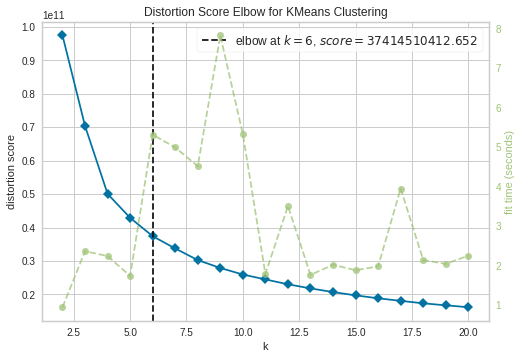

In [14]:
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(df)
Elbow_M.show()

In [15]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)
fitcluster = kmeans.fit_predict(df)

In [16]:
print(kmeans.cluster_centers_)

[[4.98969410e+02 0.00000000e+00 0.00000000e+00 6.73559511e+01
  1.49721913e+00 5.71917686e+02 1.35257508e+02 1.77718576e+03
  1.02597330e+01 5.18476974e+03 2.79288098e+01 1.49721913e+00
  5.52761902e+03]
 [8.70285003e+02 0.00000000e+00 0.00000000e+00 7.04324829e+01
  1.38270068e+00 6.23889235e+02 1.24260112e+02 1.96023522e+03
  1.10049782e+01 8.54479091e+03 4.93055383e+01 1.38270068e+00
  6.10376478e+03]
 [1.55203333e+02 0.00000000e+00 0.00000000e+00 5.13266667e+01
  1.03055556e+00 6.50878333e+02 8.62716667e+01 2.30717444e+03
  6.33388889e+00 1.67260778e+03 8.39500000e+00 1.03055556e+00
  1.76562944e+03]
 [8.70517432e+02 0.00000000e+00 0.00000000e+00 5.23918096e+01
  1.01272828e+00 6.73104040e+02 8.65047039e+01 2.38618373e+03
  5.95904815e+00 8.54466962e+03 4.93076923e+01 1.01272828e+00
  1.74507858e+03]
 [4.91099309e+02 0.00000000e+00 0.00000000e+00 5.28548083e+01
  9.89314896e-01 6.76344437e+02 8.74588309e+01 2.39520113e+03
  5.46197360e+00 5.10619359e+03 2.74846009e+01 9.89314896e-0

In [17]:
df['cluster'] = kmeans.labels_
df.head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,cluster
0,0,0,0,15,1,748,123,2553,12,0,0,1,3384,2
1,1,0,0,56,0,1130,26,3832,7,1,0,0,2543,2
2,2,0,0,86,1,1058,85,3398,16,2,0,1,7708,5
3,3,0,0,29,0,1105,65,3476,0,3,0,0,827,2
4,3,0,0,86,1,1058,59,3471,4,4,0,1,6696,5


In [18]:
df_cluster = df

In [19]:
df = df_copy.reset_index()

In [20]:
df_cluster2 = pd.DataFrame(fitcluster)
df_cluster2.columns = ['cluster']
combinedDf = pd.concat([df, df_cluster2], axis = 1).reset_index()

In [21]:
combinedDf

,level_0,index,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,cluster
0,0,0,2022-07-06 04:00:00.000,32.72,KOTA SUKABUMI,Cikujang,2,1040.0,121.0,19.150,13,33470770,2022-07-06,2.0,"MULTILINESTRING ((106.920499 -6.943148, 106.92...",2
1,1,1,2022-07-06 06:00:00.000,32.72,KOTA SUKABUMI,N11 Lingkar Selatan Sukabumi,1,1736.0,72.5,26.915,8,33470771,2022-07-06,1.0,"MULTILINESTRING ((106.913803 -6.945039, 106.91...",2
2,2,2,2022-07-06 07:00:00.000,32.72,KOTA SUKABUMI,RA Kosasih,2,1554.0,102.0,23.820,17,33470772,2022-07-06,2.0,"MULTILINESTRING ((106.950092 -6.920693, 106.94...",5
3,3,3,2022-07-06 08:00:00.000,32.72,KOTA SUKABUMI,Jalan Selabintana,1,1661.0,92.0,24.280,1,33470773,2022-07-06,1.0,"LINESTRING (106.935435 -6.910731, 106.935807 -...",2
4,4,4,2022-07-06 08:00:00.000,32.72,KOTA SUKABUMI,RA Kosasih,2,1554.0,89.0,24.250,5,33470774,2022-07-06,2.0,"MULTILINESTRING ((106.93553 -6.923046, 106.940...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,10252,10382,2022-09-04 20:00:00.000,32.72,KOTA SUKABUMI,Pelabuhan 2,2,829.0,63.0,19.250,1,37226848,2022-09-04,2.0,"LINESTRING (106.907035 -6.956232, 106.907099 -...",3
10253,10253,10383,2022-09-04 20:00:00.000,32.72,KOTA SUKABUMI,KH Oim Abdurochim,2,673.0,81.0,18.840,21,37226846,2022-09-04,2.0,"MULTILINESTRING ((106.908819 -6.905999, 106.90...",3
10254,10254,10384,2022-09-04 21:00:00.000,32.72,KOTA SUKABUMI,Pelabuhan 2,1,960.0,72.0,20.930,7,37226849,2022-09-04,1.0,"MULTILINESTRING ((106.912294 -6.951835, 106.91...",3
10255,10255,10385,2022-09-04 22:00:00.000,32.72,KOTA SUKABUMI,Pesona Cibureum Permai,3,171.0,118.0,4.140,3,37226850,2022-09-04,3.0,"MULTILINESTRING ((106.95642 -6.9163, 106.95639...",1


In [22]:
df_cluster

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,cluster
0,0,0,0,15,1,748,123,2553,12,0,0,1,3384,2
1,1,0,0,56,0,1130,26,3832,7,1,0,0,2543,2
2,2,0,0,86,1,1058,85,3398,16,2,0,1,7708,5
3,3,0,0,29,0,1105,65,3476,0,3,0,0,827,2
4,3,0,0,86,1,1058,59,3471,4,4,0,1,6696,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10382,1059,0,0,71,1,575,7,2572,0,10253,60,1,130,3
10383,1059,0,0,36,1,423,43,2496,20,10251,60,1,2209,3
10384,1060,0,0,71,0,685,25,2873,6,10254,60,0,2413,3
10385,1061,0,0,79,2,12,117,171,2,10255,60,2,8080,1


In [23]:
df

,index,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,2022-07-06 04:00:00.000,32.72,KOTA SUKABUMI,Cikujang,2,1040.0,121.0,19.150,13,33470770,2022-07-06,2.0,"MULTILINESTRING ((106.920499 -6.943148, 106.92..."
1,1,2022-07-06 06:00:00.000,32.72,KOTA SUKABUMI,N11 Lingkar Selatan Sukabumi,1,1736.0,72.5,26.915,8,33470771,2022-07-06,1.0,"MULTILINESTRING ((106.913803 -6.945039, 106.91..."
2,2,2022-07-06 07:00:00.000,32.72,KOTA SUKABUMI,RA Kosasih,2,1554.0,102.0,23.820,17,33470772,2022-07-06,2.0,"MULTILINESTRING ((106.950092 -6.920693, 106.94..."
3,3,2022-07-06 08:00:00.000,32.72,KOTA SUKABUMI,Jalan Selabintana,1,1661.0,92.0,24.280,1,33470773,2022-07-06,1.0,"LINESTRING (106.935435 -6.910731, 106.935807 -..."
4,4,2022-07-06 08:00:00.000,32.72,KOTA SUKABUMI,RA Kosasih,2,1554.0,89.0,24.250,5,33470774,2022-07-06,2.0,"MULTILINESTRING ((106.93553 -6.923046, 106.940..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10252,10382,2022-09-04 20:00:00.000,32.72,KOTA SUKABUMI,Pelabuhan 2,2,829.0,63.0,19.250,1,37226848,2022-09-04,2.0,"LINESTRING (106.907035 -6.956232, 106.907099 -..."
10253,10383,2022-09-04 20:00:00.000,32.72,KOTA SUKABUMI,KH Oim Abdurochim,2,673.0,81.0,18.840,21,37226846,2022-09-04,2.0,"MULTILINESTRING ((106.908819 -6.905999, 106.90..."
10254,10384,2022-09-04 21:00:00.000,32.72,KOTA SUKABUMI,Pelabuhan 2,1,960.0,72.0,20.930,7,37226849,2022-09-04,1.0,"MULTILINESTRING ((106.912294 -6.951835, 106.91..."
10255,10385,2022-09-04 22:00:00.000,32.72,KOTA SUKABUMI,Pesona Cibureum Permai,3,171.0,118.0,4.140,3,37226850,2022-09-04,3.0,"MULTILINESTRING ((106.95642 -6.9163, 106.95639..."


# Clusterring Berdasarkan Street

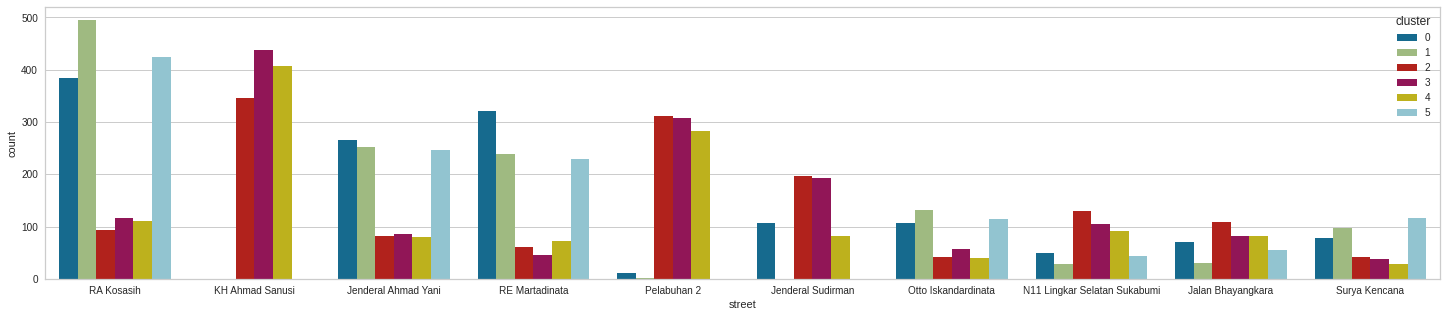

In [24]:
top_5_street = combinedDf['street'].value_counts().head(10).index
plt.subplots(figsize = (25,5))
ax=sns.countplot(x=combinedDf['street'],order=top_5_street,hue=combinedDf['cluster'])
plt.show()

# Clusterring Berdasarkan Median Length

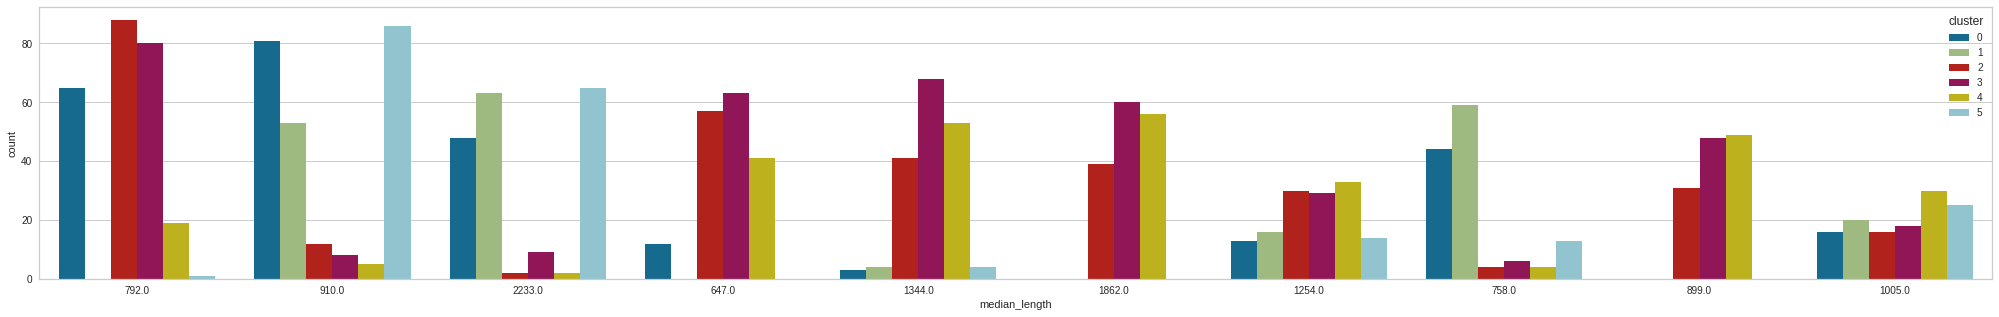

In [25]:
top_5_length = combinedDf['median_length'].value_counts().head(10).index
plt.subplots(figsize = (35,5))
ax=sns.countplot(x=combinedDf['median_length'],order=top_5_length,hue=combinedDf['cluster'])
plt.show()

# Clusterring Berdasarkan Median Speed

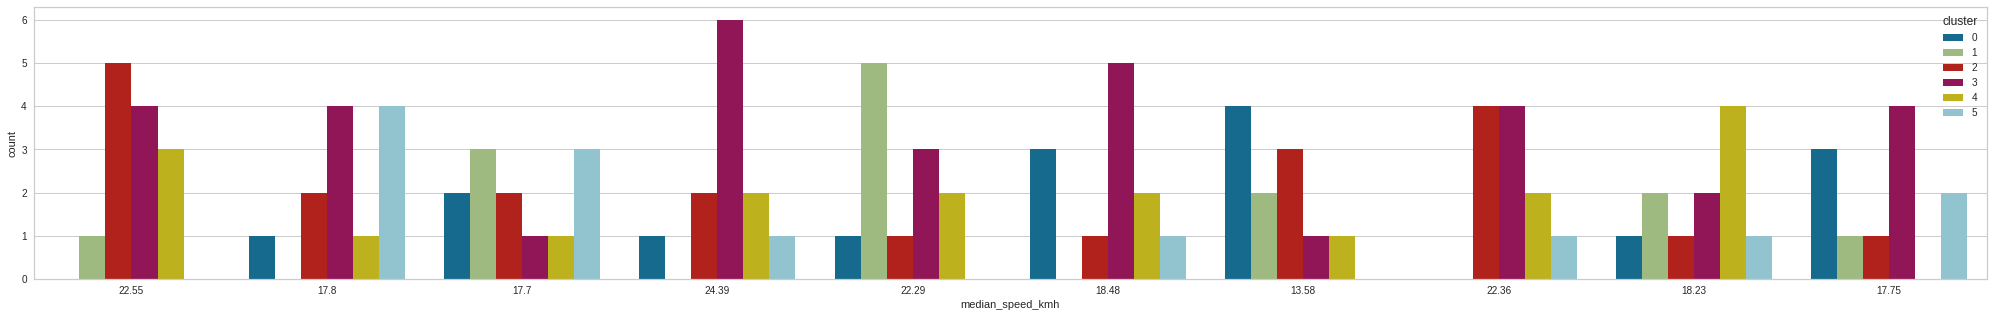

In [26]:
top_5_speed = combinedDf['median_speed_kmh'].value_counts().head(10).index
plt.subplots(figsize = (35,5))
ax=sns.countplot(x=combinedDf['median_speed_kmh'],order=top_5_speed,hue=combinedDf['cluster'])
plt.show()

# Clusterring Berdasarkan Delay

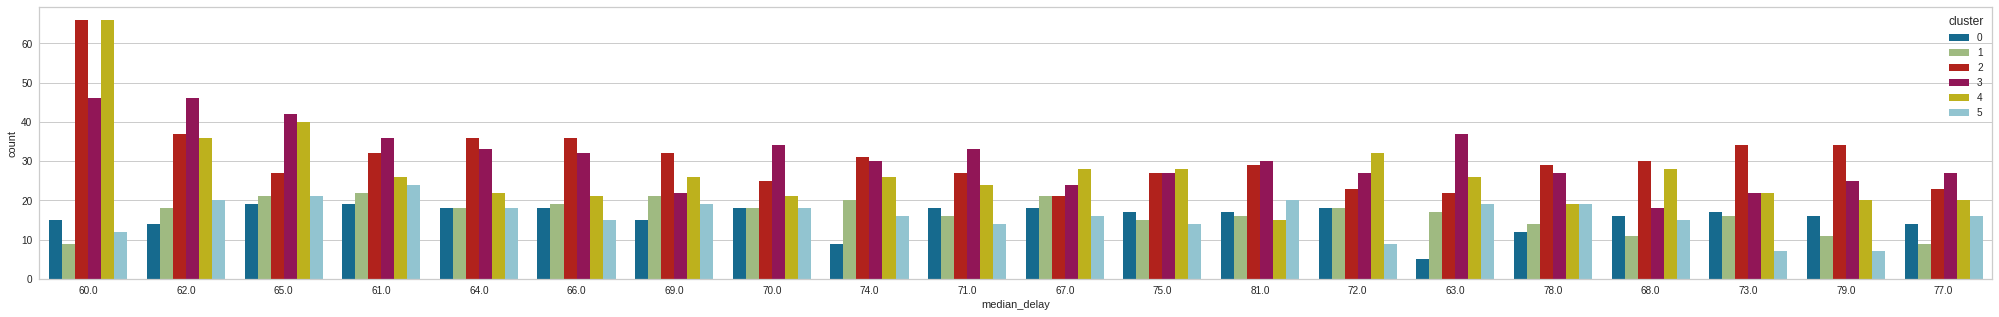

In [27]:
top_5_delay = combinedDf['median_delay'].value_counts().head(20).index
plt.subplots(figsize = (35,5))
ax=sns.countplot(x=combinedDf['median_delay'],order=top_5_delay,hue=combinedDf['cluster'])
plt.show()

Text(0, 0.5, 'cluster')

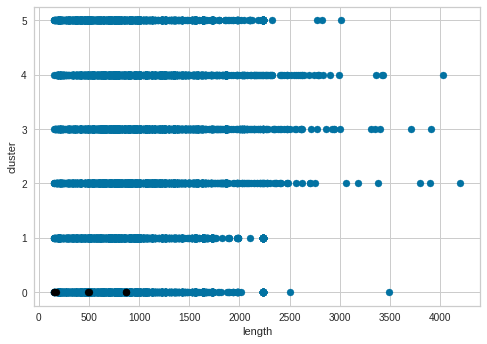

In [28]:
plt.scatter(combinedDf['median_length'],combinedDf['cluster'],cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.xlabel('length')
plt.ylabel('cluster')

In [29]:
df['street'].nunique()

111